In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv(r"D:\Machine Learning Practical\Position_Salaries.csv")

In [3]:
print("Dataset Preview:")
print(data.head())

Dataset Preview:
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [4]:
X = data[['Level']].values
y = data['Salary'].values

In [5]:
linear_model = LinearRegression()
linear_model.fit(X, y)

LinearRegression()

In [6]:
degree = 4  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

In [7]:
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

LinearRegression()

In [8]:
y_pred_linear = linear_model.predict(X)
y_pred_poly = poly_model.predict(X_poly)


In [9]:
linear_mse = mean_squared_error(y, y_pred_linear)
poly_mse = mean_squared_error(y, y_pred_poly)

In [10]:
linear_r2 = r2_score(y, y_pred_linear)
poly_r2 = r2_score(y, y_pred_poly)

In [11]:
print("\nModel Evaluation:")
print(f"Simple Linear Regression - MSE: {linear_mse:.2f}, R^2: {linear_r2:.2f}")
print(f"Polynomial Regression (degree {degree}) - MSE: {poly_mse:.2f}, R^2: {poly_r2:.2f}")


Model Evaluation:
Simple Linear Regression - MSE: 26695878787.88, R^2: 0.67
Polynomial Regression (degree 4) - MSE: 210343822.84, R^2: 1.00


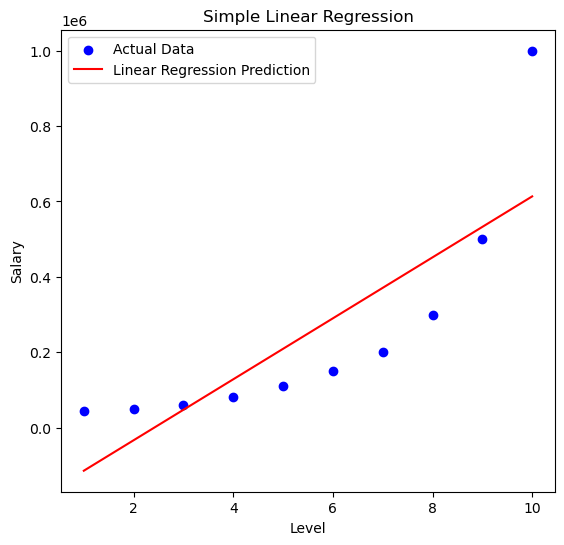

In [12]:
# Visualize the results
plt.figure(figsize=(14, 6))

# Simple Linear Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_pred_linear, color="red", label="Linear Regression Prediction")
plt.title("Simple Linear Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend()


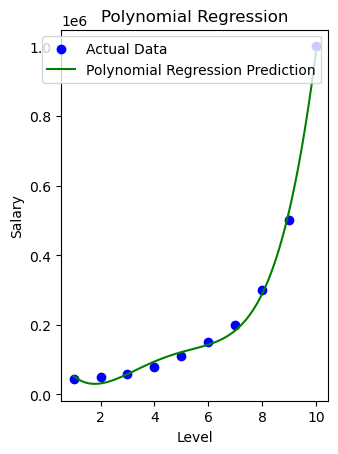

In [14]:
# Polynomial Regression Plot
plt.subplot(1, 2, 2)
plt.scatter(X, y, color="blue", label="Actual Data")
X_grid = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
plt.plot(X_grid, poly_model.predict(poly_features.transform(X_grid)), color="green", label="Polynomial Regression Prediction")
plt.title("Polynomial Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
level_11 = np.array([[11]])
level_12 = np.array([[12]])

In [16]:
salary_11_linear = linear_model.predict(level_11)
salary_12_linear = linear_model.predict(level_12)


In [17]:
salary_11_poly = poly_model.predict(poly_features.transform(level_11))
salary_12_poly = poly_model.predict(poly_features.transform(level_12))

In [18]:
print("\nPredictions for Levels 11 and 12:")
print(f"Level 11 - Linear Regression: {salary_11_linear[0]:.2f}, Polynomial Regression: {salary_11_poly[0]:.2f}")
print(f"Level 12 - Linear Regression: {salary_12_linear[0]:.2f}, Polynomial Regression: {salary_12_poly[0]:.2f}")


Predictions for Levels 11 and 12:
Level 11 - Linear Regression: 694333.33, Polynomial Regression: 1780833.33
Level 12 - Linear Regression: 775212.12, Polynomial Regression: 3035984.85
